In [2]:
# %load ../uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt

import sys, os, pdb

# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
	parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)

# And standard list of subdirectories
if '%s/pyuoi' % p not in sys.path:
	sys.path.append('%s/pyuoi' % p)

from pyuoi.linear_model.lasso import UoI_Lasso
from pyuoi.linear_model.elasticnet import UoI_ElasticNet

if '%s/uoicorr' % p not in sys.path:
    sys.path.append('%s/uoicorr' % p)

from postprocess import postprocess_file, postprocess_dir

In [9]:
from utils import gen_data, gen_covariance, gen_beta2, selection_accuracy
from sklearn.metrics import r2_score

In [37]:
# Generate synthetic data
sigma = gen_covariance(200, 0, 200, 10, 1)
beta = gen_beta2(200, 200, betawidth = 0.5, sparsity = 1)
X, X_test, y, y_test = gen_data(600, 200, covariance = sigma, beta = beta)

(array([ 3.,  5., 20., 69., 74., 24.,  4.,  0.,  0.,  1.]),
 array([1.9342801 , 2.69671001, 3.45913993, 4.22156985, 4.98399977,
        5.74642969, 6.5088596 , 7.27128952, 8.03371944, 8.79614936,
        9.55857928]),
 <a list of 10 Patch objects>)

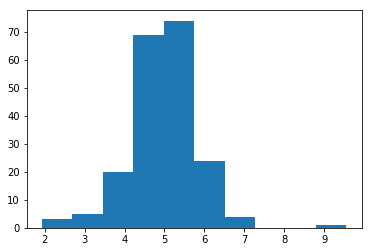

In [38]:
plt.hist(beta)

In [14]:
from exp_types import CV_Lasso, EN
from sklearn.linear_model import LassoCV, ElasticNetCV

In [20]:
# Time how long it takes to fit with CV_lasso vs LassoCV
p = {}
p['n_alphas'] = 48
p['n_boots_sel'] = 48
p['n_boots_est'] = 48
p['est_score'] = 'r2'
p['stability_selection'] = 1
p['l1_ratios'] = [0.1, 0.2, 0.5, 0.75, 0.9, 0.95, 0.99]

%time m1 = CV_Lasso.run(X, y, p)
%time m2 = LassoCV(cv = 5, n_alphas = 48).fit(X, y.ravel())
%time m3 = EN.run(X, y, p)
%time m4 = ElasticNetCV(cv = 5, n_alphas = 48, l1_ratio = p['l1_ratios']).fit(X, y.ravel())

Wall time: 1.54 s
Wall time: 273 ms
Wall time: 6.02 s
Wall time: 1.44 s
